# Narrative Analytice and Experimentation
### The question here is whether the stock market, in this case, the S&P 500, performs worse on days where there is precipitation in New York City.

By: Fred Etter

Data:

__2016 S&P 500 Return__. The S&P 500 Price index returned **9.84%** in 2016 – 
and that is the number you'll see quoted most often in the press. 
However, a more extensive calculation including dividends reveals 
that the true 2016 S&P 500 return was roughly **12.25%**.Dec 31, 2016

The source for the above information is: [dqydj.com](https://dqydj.com/2016-sp-500-return/)

Daily return data would be obtained from [Yahoo finance](https://finance.yahoo.com/)

Precipitation data was obtained from [Kaggle](https://www.kaggle.com/mathijs/weather-data-in-new-york-city-2016).

Key Terms:

About DQYDJ **(Don't Quit Your Day Job)**:  "DQYDJ is a personal finance site with a twist – we produce original research, 
visualizations, calculators and tools for our readers, along with some of the 
most well researched investing and economics articles you can find on the web."


### Exploratory Data Analysis

In [30]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Import data
df_rain = pd.read_csv('weather_data_nyc_centralpark_2016.csv')
print(len(df_rain))
#print(len(df_rain.iloc(['precipitation'!='0.00'])))
df_rain.head(n=10)

366


,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0
5,6-1-2016,41,25,33.0,0.00,0.0,0
6,7-1-2016,46,31,38.5,0.00,0.0,0
7,8-1-2016,46,31,38.5,0.00,0.0,0
8,9-1-2016,47,40,43.5,T,0.0,0
9,10-1-2016,59,40,49.5,1.80,0.0,0


In [39]:
df_rain.dtypes

date                    object
maximum temperature      int64
minimum temperature      int64
average temperature    float64
precipitation           object
snow fall               object
snow depth              object
dtype: object

#### Below is just an example of the maximum temperature in NYC in 2016; this has nothing to do with precipitation.  Precipitation data needs to be cleaned before presenting in graphical format.

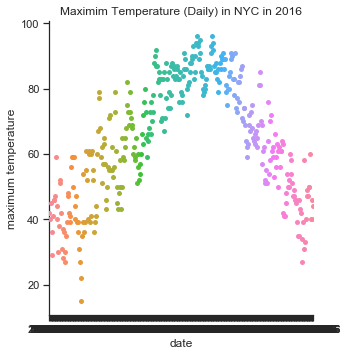

In [54]:
sns.set(style="ticks")
sns.catplot(x='date', y='maximum temperature', data=df_rain)
plt.title('Maximim Temperature (Daily) in NYC in 2016')
plt.show()


#### Cleaning the data:

- The "precipitation" column needs to be cleaned so that the rows where the value is 'T' are eliminated.
- Values in the same column need to be converted to float for graphing and statistical analysis.

# Question: Does daily precipitation in New York City affect the daily performance of the S&P 500 ?

### Statistical Analysis

1.  The Hyothesis (H1) would be that any amount of precipitation adversely affects the average daily return of the S&P 500.
2.  The Null Hypothesis (H0) would be that the study shows no significant difference between the average return for days where precipitation occurred versus days where precipitation did not occur.

#### Method:
- Get the daily returns from Yahoo Finance of the S&P 500 to obtain the total return for days where there was precipitation according to the Kaggle data.  Obviously, if there was precipitation on a weekend, we do not care about that data point.
- Run a t-test to compare the average return for precipiation days versus the total average of 12.25% as listed above (includes dividends).
- Calculate the p-value based on the t-statistic; count the number of precipitation days to use for the sample size. 
- If the p-value is less than .05, then we can reject the null hypothesis and conclude that there was a significant difference in performance on precipitation days.

#### Flaws:
- If the precipitation average is lower than 12.25%, we may want to use 9.84% which is the return without dividends.  This is a more conservative (lower) estimate of the return which would make our study even more valid if we can reject the Null using this 9.84 number.
- 2016 could have been a year where more precipitation than norm occurred or it could have been the opposite.  If not too many days of precipitation occurred, we may have a sample size that is too small to draw conclusions.
- We would want to study other years in the past besides just 2016 because 2016 could have been an odd year and not consistent with returns on precipitation days for most other years.
- The timing of the precipitation could be an issue.  If it rained from 3 to 4 am and was sunny and warm from 6 am onward, this is not really a 'precipitation' day even though it did rain.
- Snow could have a different affect than rain.
- Another source - [ycharts](https://ycharts.com/indicators/sandp_500_total_return_annual) lists the total return including dividends for 2016 as 11.96% (compared to our number of 12.25%)

### Statistical Question:  Can we reject the Null Hypothesis ?

#### If the p-value is less than .05, then we can reject the null hypothesis and conclude that there was a significant difference in performance on precipitation days.


### Further Research
- Run this study with other years in addition to year 2016.
- Separate snow from rain days.
- Look at the weather at a specific point in time during each trading day, for example, 9 am Eastern.
- We could separate the non precipitation days and calculate the total return for those days to compare to the total return of the precipitation days.  This would be a little more work and may be worth it. 

### Conclusion

- Even if we can reject the Null Hypothesis, we may not be able conclude that precipitation caused the lower total return.  The days of precipitation could have caused the subway system in NYC to break down and prevented many market participants from accessing the market in their normal manner, for example.
- Furthermore, rejection of the Null could be caused by a significant **increase** in performance, which is not consistent with our original hypothesis (H1).
- An additional note from Investopedia:  "In fact, the financial media often blames a sluggish quarter of gross domestic product (GDP) growth or stock market performance on weather problems. ... One alternative theory, an offshoot of behavioral finance, states that weather clearly affects **mood**, and mood clearly affects investor behavior." Nov 10, 2015 [Investopedia](https://www.investopedia.com/articles/markets/111015/does-weather-affect-stock-market.asp)
